In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [56]:
df=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\Machine Learning\regression\1553768847-housing.csv')

In [57]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [59]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [60]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

In [61]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [62]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr_mat = numeric_columns.corr()


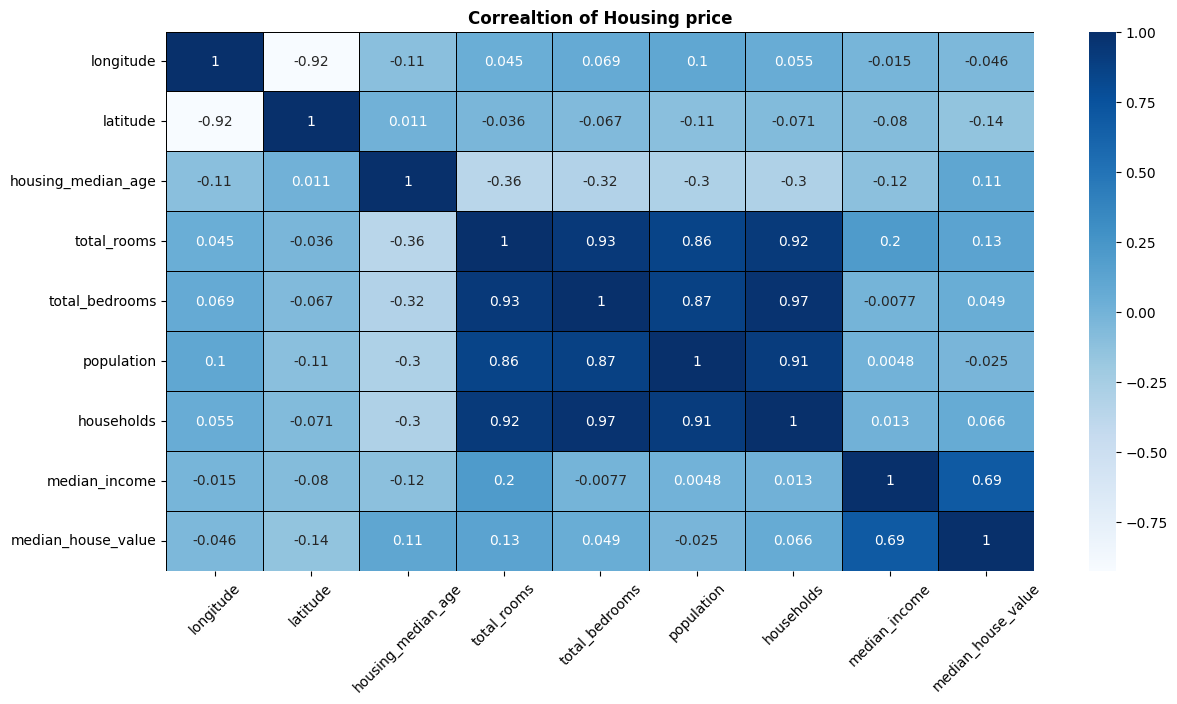

In [63]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat,cmap ="Blues",annot=True,linewidth=0.5,linecolor ="black")
plt.title("Correaltion of Housing price", loc="center", fontweight='bold')
plt.xticks(rotation=45)
plt.show()

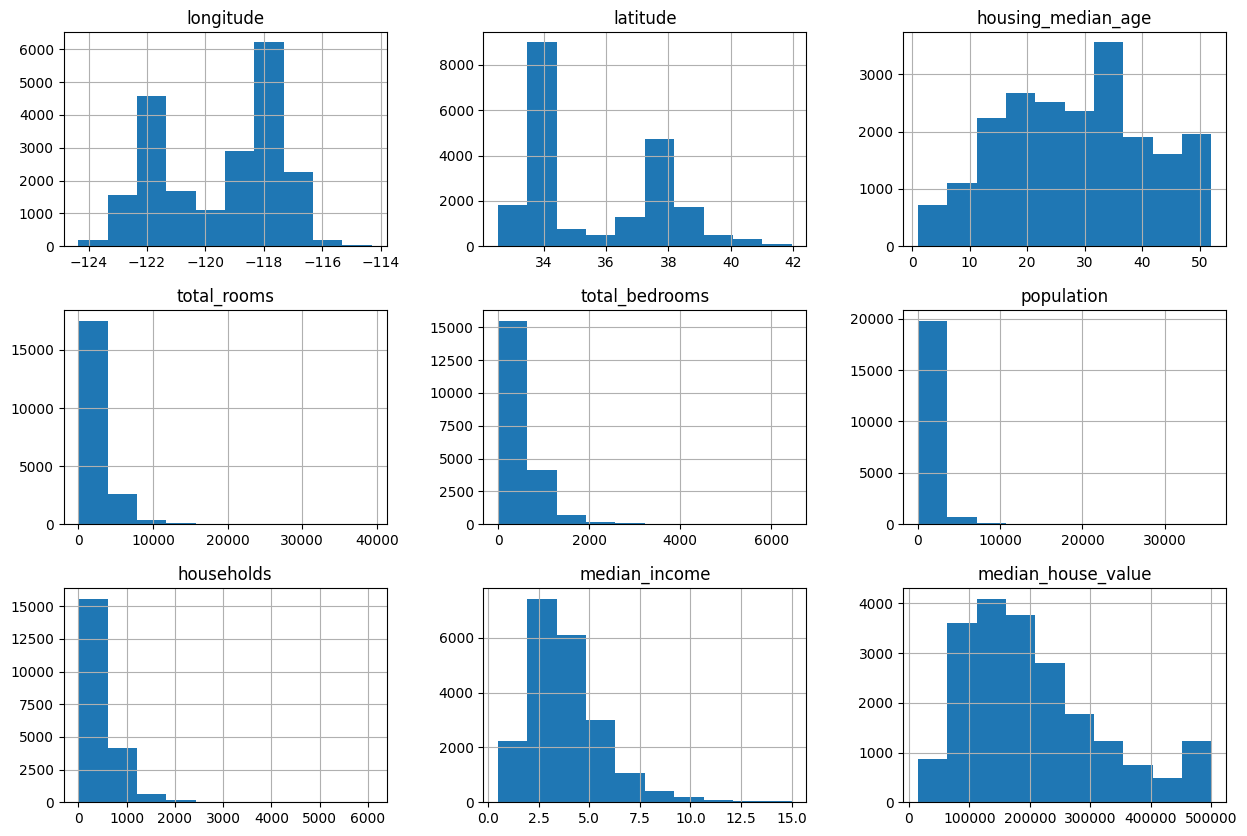

In [64]:
df.hist(figsize=(15,10))
plt.show()

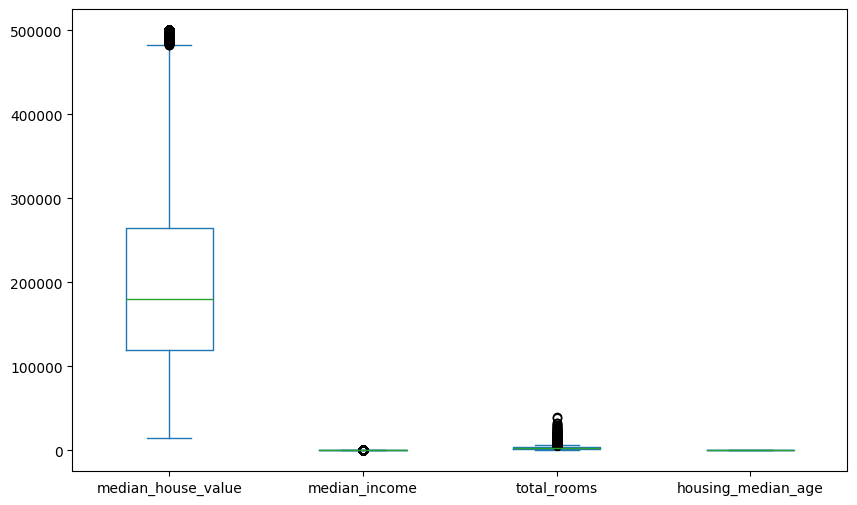

In [65]:
df[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']].plot(kind='box', figsize=(10, 6))
plt.show()


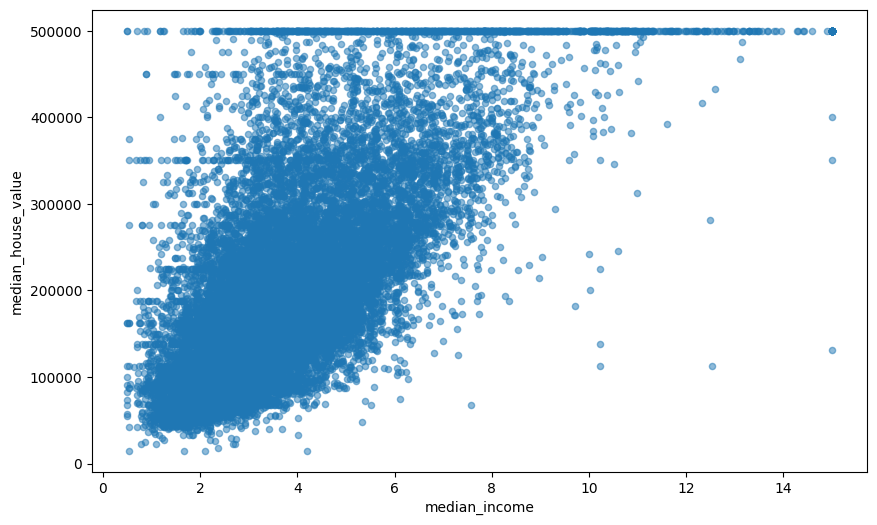

In [66]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, figsize=(10, 6))
plt.show()


In [85]:
df = df.drop('ocean_proximity', axis=1)


 Splitting the Data

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [90]:
x=df.drop('median_house_value', axis='columns')
y=df['median_house_value']

In [91]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
model=LinearRegression()

In [95]:
model.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred=model.predict(x_test)
y_pred

array([ 75696.33491152, 166304.33789222, 265032.93786054, ...,
       439178.19697502, 130408.85287047, 175272.25192552])

In [99]:
res=y_test-y_pred

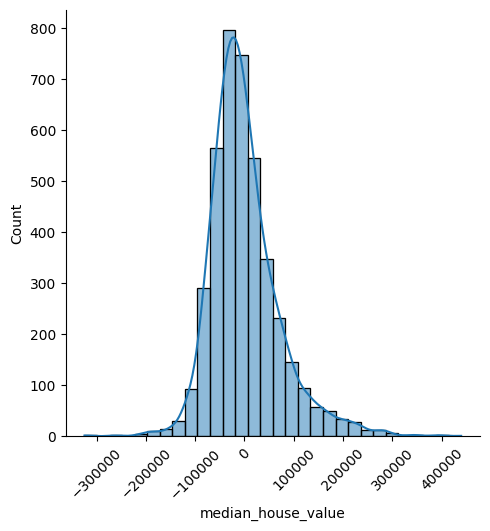

In [100]:
sns.displot(res,bins=30,kde=True)
plt.xticks(rotation=45)
plt.show()

In [101]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [103]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f"Testing Accuracy: {model.score(x_test, y_test)}")

Mean Squared Error: 5052953703.901592
Mean Absolute Error: 51835.7347262832
R-Squared: 0.6143987268246052
Training Accuracy: 0.6400947924305292
Testing Accuracy: 0.6143987268246052


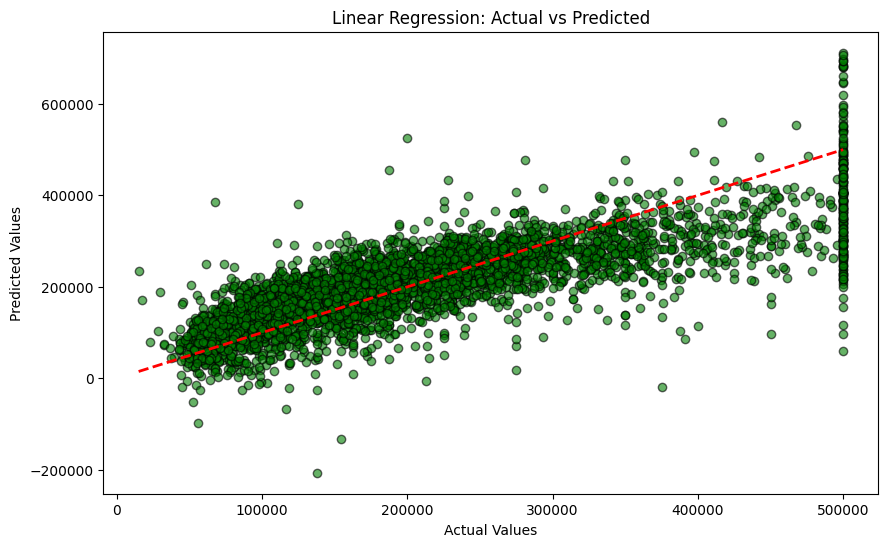

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [108]:
model1=RandomForestRegressor()
model1.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
pred1=model1.predict(x_test)

In [112]:
result=y_test-pred1

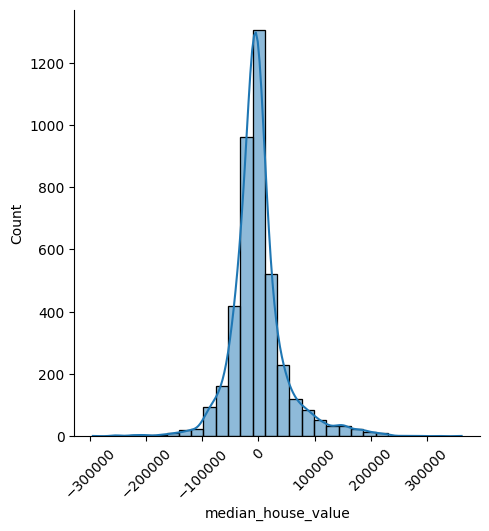

In [113]:
sns.displot(result,bins=30,kde=True)
plt.xticks(rotation=45)
plt.show()

In [114]:
mse_rf = mean_squared_error(y_test, pred1)
mae_rf = mean_absolute_error(y_test, pred1)
r2_rf = r2_score(y_test, pred1)

In [115]:
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-Squared: {r2_rf}")
print(f'Training Accuracy: {model1.score(x_train, y_train)}')
print(f"Testing Accuracy: {model1.score(x_test, y_test)}")

Mean Squared Error: 2462118924.0892496
Mean Absolute Error: 32144.069314437987
R-Squared: 0.8121106490437503
Training Accuracy: 0.9749483551605806
Testing Accuracy: 0.8121106490437503


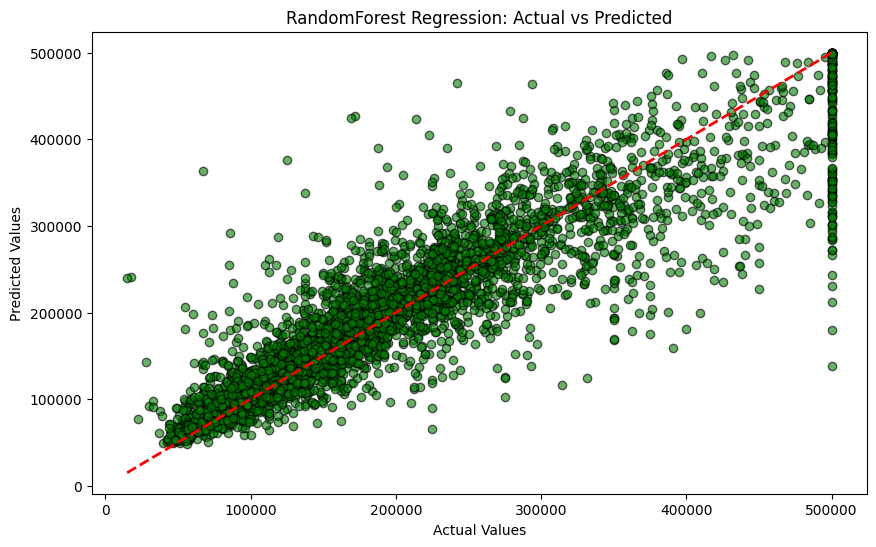

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, pred1, color='green', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForest Regression: Actual vs Predicted')
plt.show()

In [118]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f"Testing Accuracy: {model.score(x_test, y_test)}")

print()


print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-Squared: {r2_rf}")
print(f'Training Accuracy: {model1.score(x_train, y_train)}')
print(f"Testing Accuracy: {model1.score(x_test, y_test)}")

Mean Squared Error: 5052953703.901592
Mean Absolute Error: 51835.7347262832
R-Squared: 0.6143987268246052
Training Accuracy: 0.6400947924305292
Testing Accuracy: 0.6143987268246052

Mean Squared Error: 2462118924.0892496
Mean Absolute Error: 32144.069314437987
R-Squared: 0.8121106490437503
Training Accuracy: 0.9749483551605806
Testing Accuracy: 0.8121106490437503


In [119]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr}, R2: {r2_svr}")


SVR MSE: 8945463514.809517, R2: 0.317353310046917


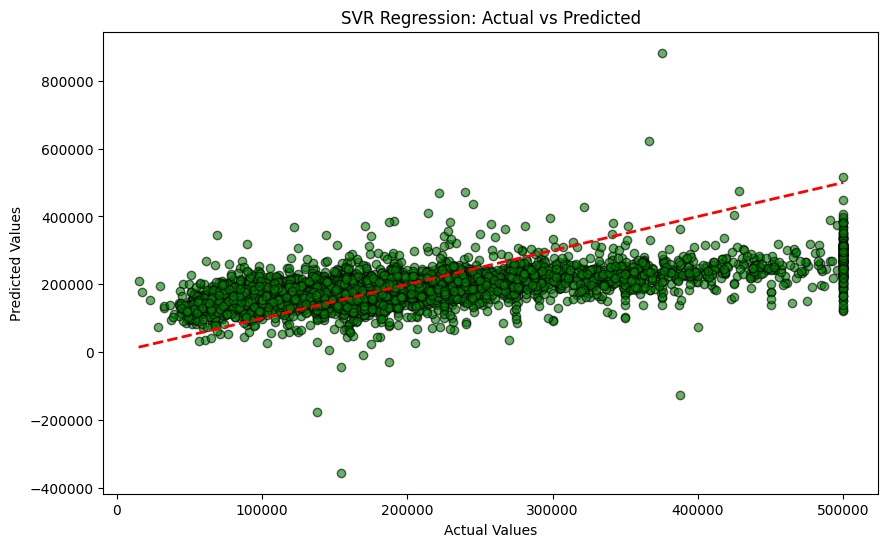

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_svr, color='green', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Regression: Actual vs Predicted')
plt.show()

In [123]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)

# Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso}, R2: {r2_lasso}")


Lasso MSE: 5052952589.874108, R2: 0.6143988118383301


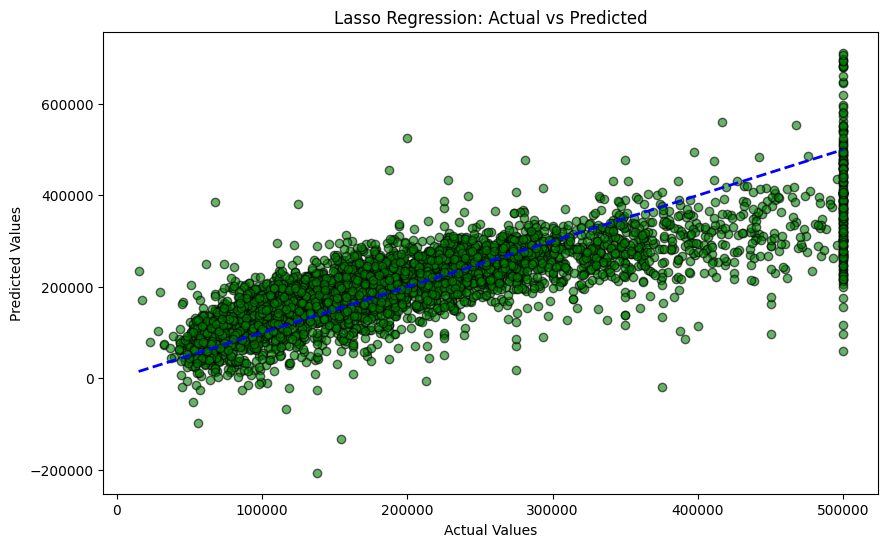

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lasso, color='green', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()